In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')  # Replace with your dataset path
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime


In [3]:
# Display the first few rows and summary statistics
print(data.head())
print(data.describe())


        Date  Soil_Moisture_10cm  Soil_Moisture_30cm  Soil_Moisture_50cm  \
0 2023-01-01           21.236204           43.260405           57.618343   
1 2023-01-02           38.521429           46.363195           58.157143   
2 2023-01-03           31.959818           26.130122           56.594576   
3 2023-01-04           27.959755           18.851817           34.806348   
4 2023-01-05           14.680559           22.977731           20.618265   

   Temperature   Humidity  Rainfall Growth_Stage  
0    22.763399  67.763918  3.378701     Seedling  
1    27.865764  71.744921  5.571807     Seedling  
2    24.165058  57.272464  3.540210     Seedling  
3    25.912336  67.653485  1.774051     Seedling  
4    33.829296  65.058859  2.412717     Seedling  
                      Date  Soil_Moisture_10cm  Soil_Moisture_30cm  \
count                  120          120.000000          120.000000   
mean   2023-03-01 12:00:00           24.313302           31.921313   
min    2023-01-01 00:00:00 

In [5]:
# Check for missing values
print(data.isnull().sum())




Date                  0
Soil_Moisture_10cm    0
Soil_Moisture_30cm    0
Soil_Moisture_50cm    0
Temperature           0
Humidity              0
Rainfall              0
Growth_Stage          0
dtype: int64


In [6]:
# Create differences between soil moisture measurements
data['Moisture_Diff_10_30'] = data['Soil_Moisture_10cm'] - data['Soil_Moisture_30cm']
data['Moisture_Diff_30_50'] = data['Soil_Moisture_30cm'] - data['Soil_Moisture_50cm']


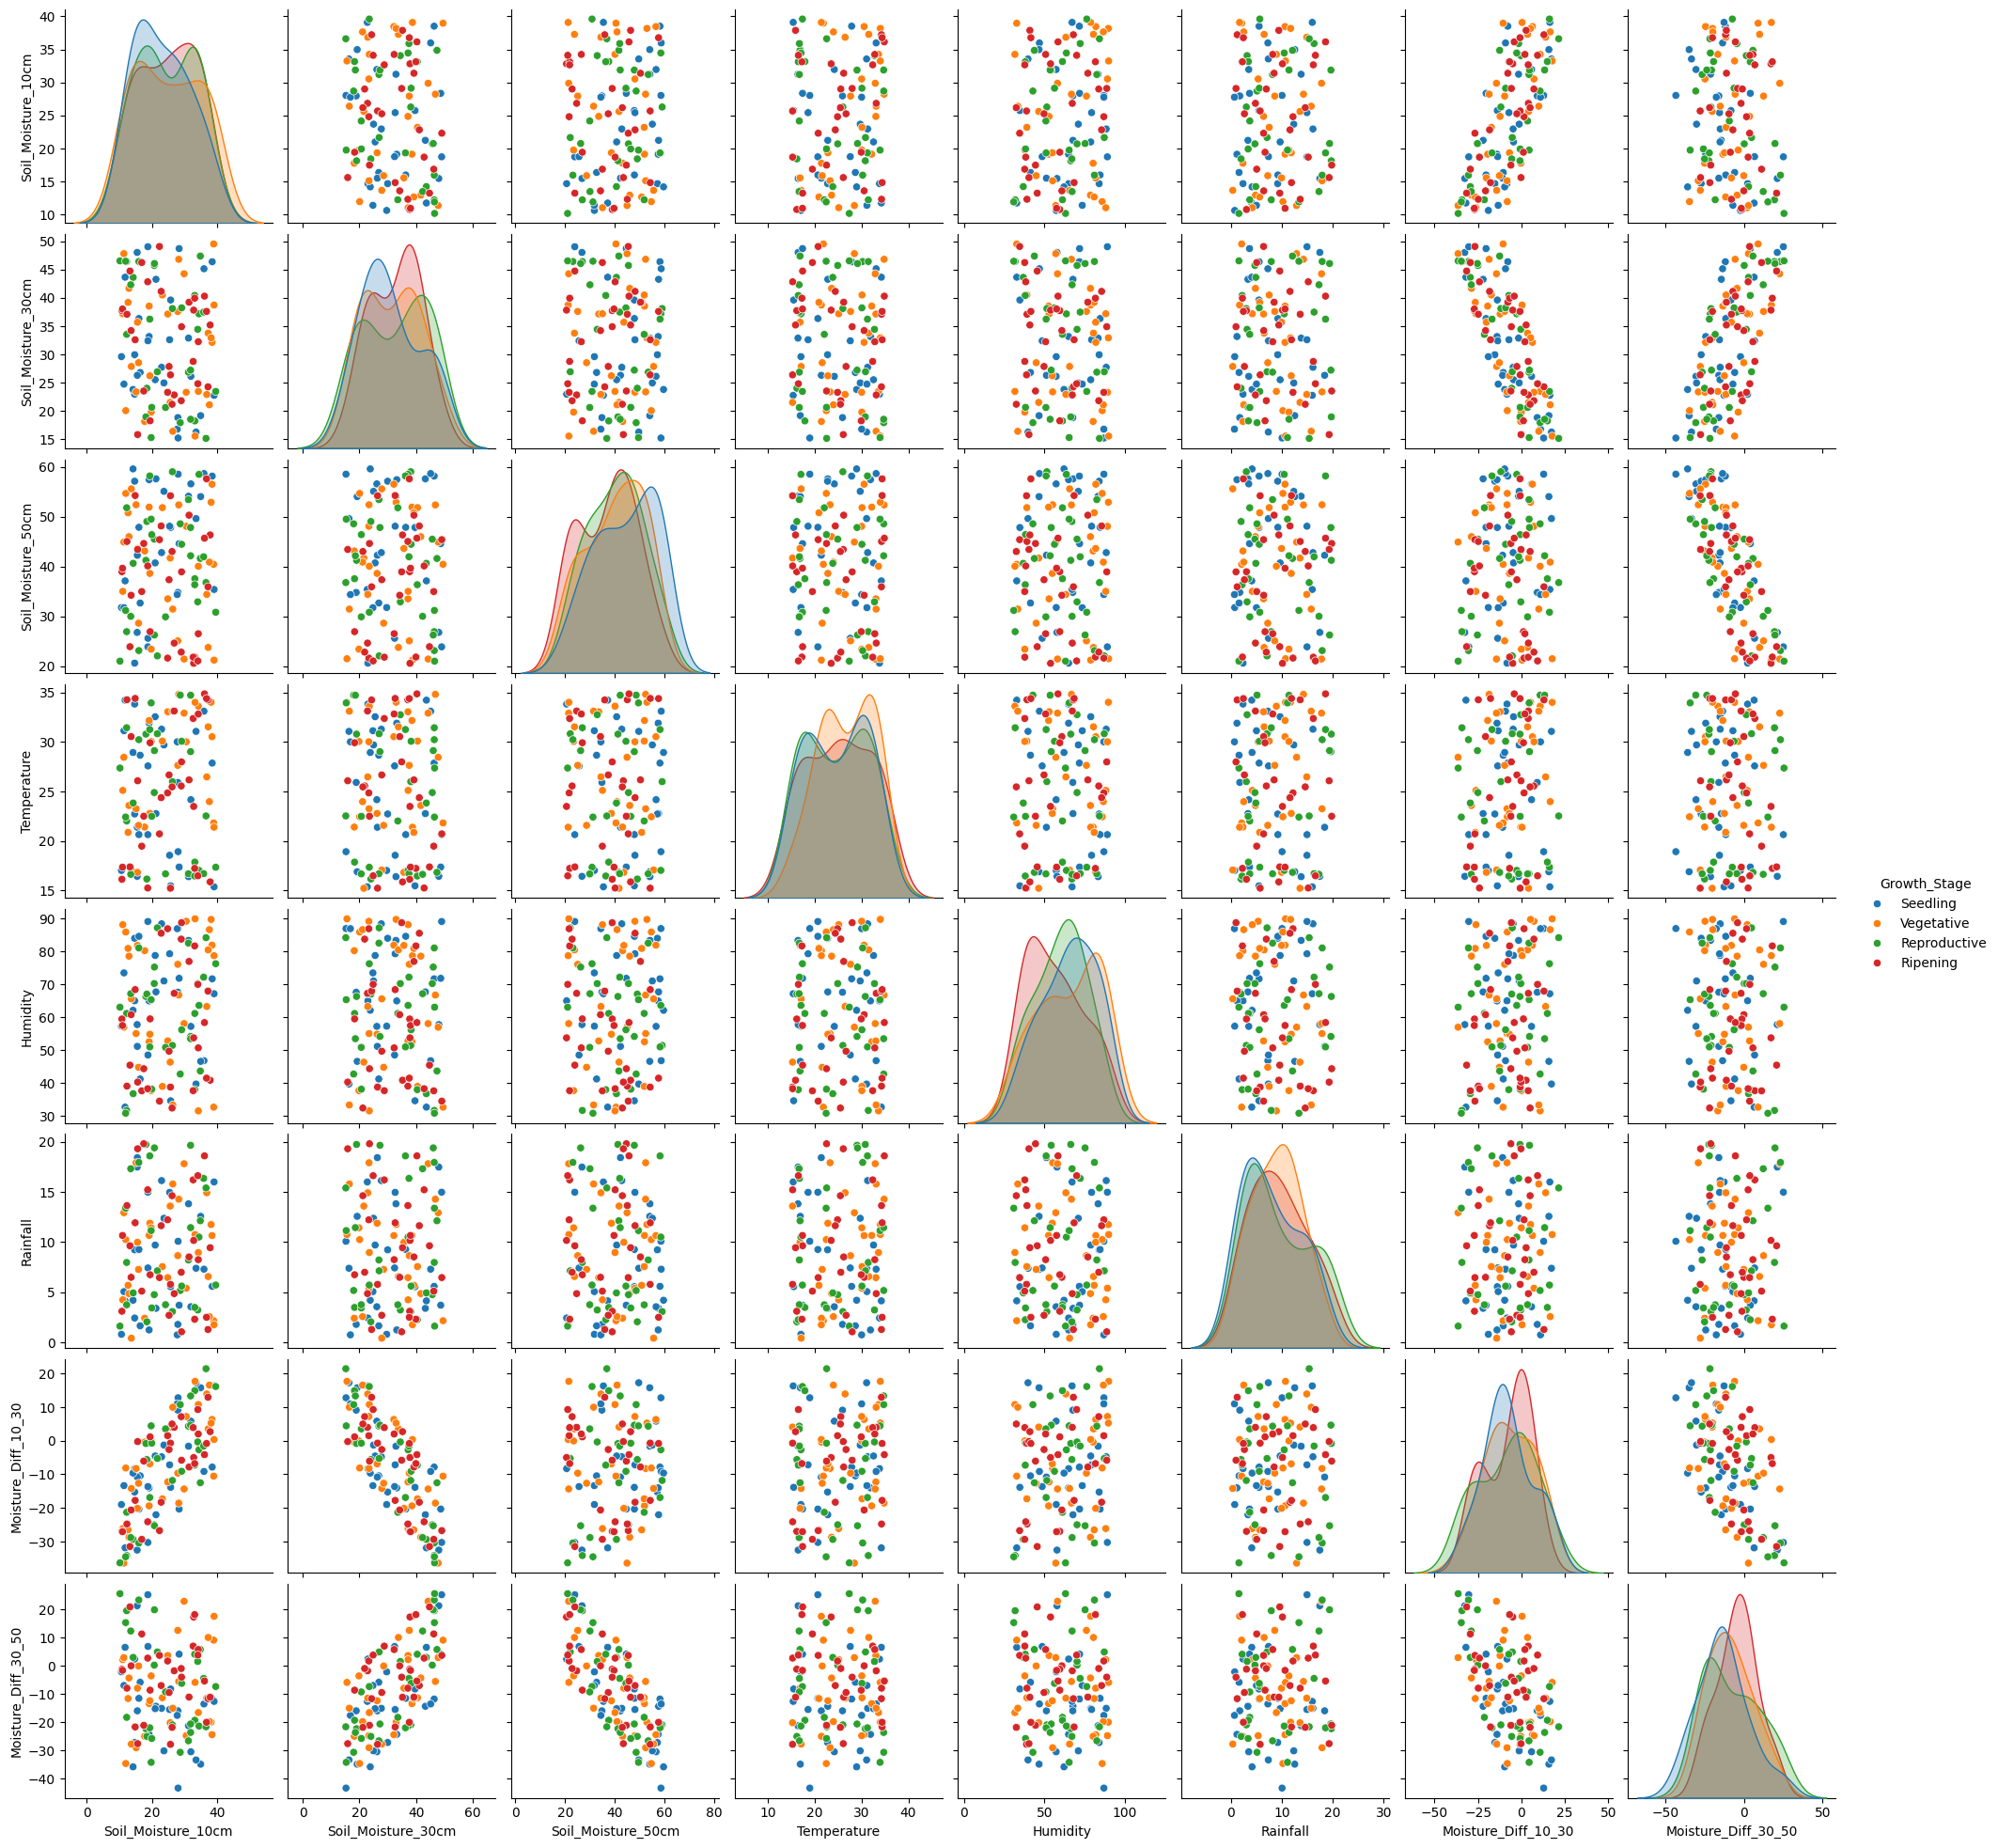

In [7]:
# Pairplot to visualize relationships
sns.pairplot(data, diag_kind='kde', hue='Growth_Stage')
plt.show()


In [8]:
# Define features and target variable
X = data[['Soil_Moisture_30cm', 'Soil_Moisture_50cm', 'Temperature', 'Humidity', 'Rainfall', 'Growth_Stage']]
y = data['Soil_Moisture_10cm']

# Encode categorical variables (Growth Stage)
X = pd.get_dummies(X, columns=['Growth_Stage'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 90.80235234897513


In [10]:
# Get predicted soil moisture values
predicted_moisture = model.predict(X)

# Set a threshold based on predicted moisture levels (e.g., 30th percentile)
moisture_threshold = np.percentile(predicted_moisture, 30)  # Adjust as necessary
print(f'Irrigation Threshold (10cm): {moisture_threshold}')


Irrigation Threshold (10cm): 23.222292224235606


In [11]:
def should_irrigate(current_moisture):
    return current_moisture < moisture_threshold

# Example check using the last recorded soil moisture
current_moisture = data['Soil_Moisture_10cm'].iloc[-1]  # Get the last value
irrigate = should_irrigate(current_moisture)

print(f"Should irrigate? {'Yes' if irrigate else 'No'}")


Should irrigate? No


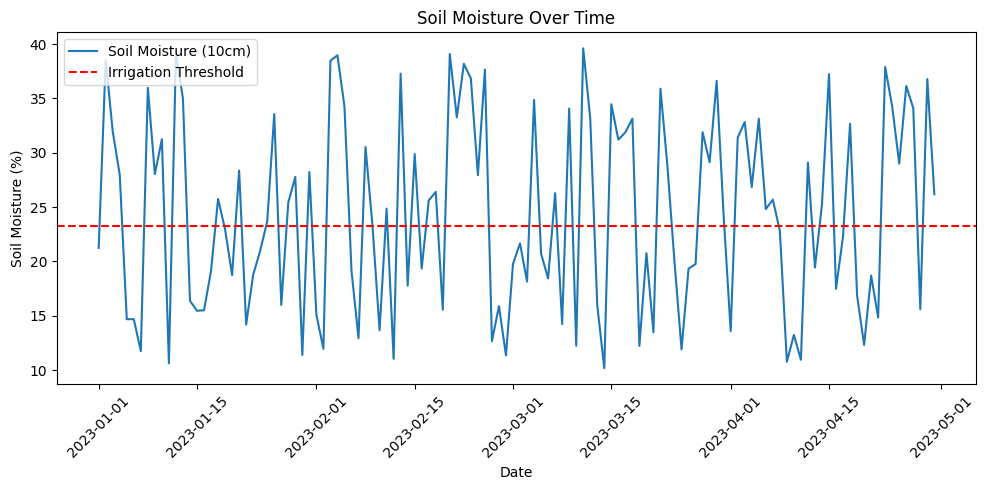

In [12]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing soil moisture and dates
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Soil_Moisture_10cm'], label='Soil Moisture (10cm)')
plt.axhline(y=23.22, color='r', linestyle='--', label='Irrigation Threshold')
plt.title('Soil Moisture Over Time')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# Data preparation
data.dropna(inplace=True)  # Handle missing values

# Check the unique growth stages
print("Unique Growth Stages:", data['Growth_Stage'].unique())

# Define a function to calculate thresholds
def calculate_thresholds(data):
    thresholds = {}
    
    # Group by Growth Stage
    for growth_stage in data['Growth_Stage'].unique():
        stage_data = data[data['Growth_Stage'] == growth_stage]
        
        # Calculate thresholds based on the mean or another statistic
        thresholds[growth_stage] = {
            'Soil_Moisture_10cm': stage_data['Soil_Moisture_10cm'].mean(),
            'Soil_Moisture_30cm': stage_data['Soil_Moisture_30cm'].mean(),
            'Soil_Moisture_50cm': stage_data['Soil_Moisture_50cm'].mean(),
            'Temperature': stage_data['Temperature'].mean(),
            'Humidity': stage_data['Humidity'].mean(),
            'Rainfall': stage_data['Rainfall'].mean()
        }
    
    return thresholds

# Calculate thresholds
irrigation_thresholds = calculate_thresholds(data)

# Display the irrigation thresholds
for stage, values in irrigation_thresholds.items():
    print(f"Growth Stage: {stage}")
    for feature, threshold in values.items():
        print(f"  {feature} Threshold: {threshold}")


Unique Growth Stages: ['Seedling' 'Vegetative' 'Reproductive' 'Ripening']
Growth Stage: Seedling
  Soil_Moisture_10cm Threshold: 23.157918162923107
  Soil_Moisture_30cm Threshold: 30.95983697347173
  Soil_Moisture_50cm Threshold: 44.18956616880405
  Temperature Threshold: 24.74831046082771
  Humidity Threshold: 65.30810987371997
  Rainfall Threshold: 8.019651962995816
Growth Stage: Vegetative
  Soil_Moisture_10cm Threshold: 24.89212799778653
  Soil_Moisture_30cm Threshold: 31.388921190643902
  Soil_Moisture_50cm Threshold: 40.20008757018002
  Temperature Threshold: 26.657383037232215
  Humidity Threshold: 65.37057317082888
  Rainfall Threshold: 8.972894171948973
Growth Stage: Reproductive
  Soil_Moisture_10cm Threshold: 24.46477971996671
  Soil_Moisture_30cm Threshold: 32.67891216681877
  Soil_Moisture_50cm Threshold: 40.16633394329998
  Temperature Threshold: 24.625225963547983
  Humidity Threshold: 59.817572856216515
  Rainfall Threshold: 9.293240802494681
Growth Stage: Ripening
  So

In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# Data preparation
data.dropna(inplace=True)  # Handle missing values
data['Growth_Stage'] = data['Growth_Stage'].astype('category')  # Convert to categorical if necessary

# Initialize a dictionary to store thresholds
thresholds = {}

# Calculate thresholds using Median
for growth_stage in data['Growth_Stage'].unique():
    stage_data = data[data['Growth_Stage'] == growth_stage]
    
    thresholds[growth_stage] = {
        'Soil_Moisture_10cm': stage_data['Soil_Moisture_10cm'].median(),
        'Soil_Moisture_30cm': stage_data['Soil_Moisture_30cm'].median(),
        'Soil_Moisture_50cm': stage_data['Soil_Moisture_50cm'].median(),
        'Temperature': stage_data['Temperature'].median(),
        'Humidity': stage_data['Humidity'].median(),
        'Rainfall': stage_data['Rainfall'].median()
    }

# Print the thresholds
for stage, values in thresholds.items():
    print(f"Growth Stage: {stage}")
    for feature, threshold in values.items():
        print(f"  {feature} Threshold: {threshold}")


Growth Stage: Seedling
  Soil_Moisture_10cm Threshold: 22.097277062342172
  Soil_Moisture_30cm Threshold: 28.668210596741275
  Soil_Moisture_50cm Threshold: 46.220740467482855
  Temperature Threshold: 25.03869679807452
  Humidity Threshold: 67.430720336568
  Rainfall Threshold: 7.331835006178478
Growth Stage: Vegetative
  Soil_Moisture_10cm Threshold: 25.228673969336217
  Soil_Moisture_30cm Threshold: 32.52705182509477
  Soil_Moisture_50cm Threshold: 41.297757895247614
  Temperature Threshold: 27.052751002930854
  Humidity Threshold: 66.22637733863775
  Rainfall Threshold: 9.458545657525118
Growth Stage: Reproductive
  Soil_Moisture_10cm Threshold: 22.913383222771472
  Soil_Moisture_30cm Threshold: 35.32852274703342
  Soil_Moisture_50cm Threshold: 41.439795063565086
  Temperature Threshold: 24.359508060759584
  Humidity Threshold: 62.166436190348364
  Rainfall Threshold: 7.539523249435879
Growth Stage: Ripening
  Soil_Moisture_10cm Threshold: 25.469552808200454
  Soil_Moisture_30cm Thr

In [17]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# Data preparation
data.dropna(inplace=True)  # Handle missing values
data['Growth_Stage'] = data['Growth_Stage'].astype('category')  # Convert to categorical if necessary

# Initialize a dictionary to store thresholds
thresholds = {}

# Define trim percentage
trim_percentage = 0.1  # Trim 10% from each end

# Calculate thresholds using Trimmed Mean
for growth_stage in data['Growth_Stage'].unique():
    stage_data = data[data['Growth_Stage'] == growth_stage]
    
    thresholds[growth_stage] = {
        'Soil_Moisture_10cm': np.mean(stage_data['Soil_Moisture_10cm'].sort_values()[int(len(stage_data)*trim_percentage):int(len(stage_data)*(1-trim_percentage))]),
        'Soil_Moisture_30cm': np.mean(stage_data['Soil_Moisture_30cm'].sort_values()[int(len(stage_data)*trim_percentage):int(len(stage_data)*(1-trim_percentage))]),
        'Soil_Moisture_50cm': np.mean(stage_data['Soil_Moisture_50cm'].sort_values()[int(len(stage_data)*trim_percentage):int(len(stage_data)*(1-trim_percentage))]),
        'Temperature': np.mean(stage_data['Temperature'].sort_values()[int(len(stage_data)*trim_percentage):int(len(stage_data)*(1-trim_percentage))]),
        'Humidity': np.mean(stage_data['Humidity'].sort_values()[int(len(stage_data)*trim_percentage):int(len(stage_data)*(1-trim_percentage))]),
        'Rainfall': np.mean(stage_data['Rainfall'].sort_values()[int(len(stage_data)*trim_percentage):int(len(stage_data)*(1-trim_percentage))])
    }

# Print the thresholds
for stage, values in thresholds.items():
    print(f"Growth Stage: {stage}")
    for feature, threshold in values.items():
        print(f"  {feature} Threshold: {threshold}")


Growth Stage: Seedling
  Soil_Moisture_10cm Threshold: 22.80749917424032
  Soil_Moisture_30cm Threshold: 30.61496322205235
  Soil_Moisture_50cm Threshold: 44.948548091382825
  Temperature Threshold: 24.7530038453521
  Humidity Threshold: 66.1430998599658
  Rainfall Threshold: 7.74312694789626
Growth Stage: Vegetative
  Soil_Moisture_10cm Threshold: 24.829197995853804
  Soil_Moisture_30cm Threshold: 31.14279867883464
  Soil_Moisture_50cm Threshold: 40.62659458699311
  Temperature Threshold: 26.991376752297437
  Humidity Threshold: 66.4342370112127
  Rainfall Threshold: 8.891893669736753
Growth Stage: Reproductive
  Soil_Moisture_10cm Threshold: 24.480564369713203
  Soil_Moisture_30cm Threshold: 32.983129531234276
  Soil_Moisture_50cm Threshold: 40.126493061241675
  Temperature Threshold: 24.421899315492777
  Humidity Threshold: 60.042595423791475
  Rainfall Threshold: 8.92286815359581
Growth Stage: Ripening
  Soil_Moisture_10cm Threshold: 24.843415892819507
  Soil_Moisture_30cm Threshol

In [18]:
import pandas as pd
from scipy.stats import trim_mean

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# Data preparation
data.dropna(inplace=True)  # Handle missing values
data['Growth_Stage'] = data['Growth_Stage'].astype('category')  # Convert to categorical if necessary

# Initialize a dictionary to store thresholds
thresholds = {}

# Define trim percentage
trim_percentage = 0.1  # Trim 10%

# Calculate thresholds using Winsorized Mean
for growth_stage in data['Growth_Stage'].unique():
    stage_data = data[data['Growth_Stage'] == growth_stage]
    
    thresholds[growth_stage] = {
        'Soil_Moisture_10cm': trim_mean(stage_data['Soil_Moisture_10cm'], proportiontocut=trim_percentage),
        'Soil_Moisture_30cm': trim_mean(stage_data['Soil_Moisture_30cm'], proportiontocut=trim_percentage),
        'Soil_Moisture_50cm': trim_mean(stage_data['Soil_Moisture_50cm'], proportiontocut=trim_percentage),
        'Temperature': trim_mean(stage_data['Temperature'], proportiontocut=trim_percentage),
        'Humidity': trim_mean(stage_data['Humidity'], proportiontocut=trim_percentage),
        'Rainfall': trim_mean(stage_data['Rainfall'], proportiontocut=trim_percentage)
    }

# Print the thresholds
for stage, values in thresholds.items():
    print(f"Growth Stage: {stage}")
    for feature, threshold in values.items():
        print(f"  {feature} Threshold: {threshold}")


Growth Stage: Seedling
  Soil_Moisture_10cm Threshold: 22.807499174240323
  Soil_Moisture_30cm Threshold: 30.614963222052342
  Soil_Moisture_50cm Threshold: 44.948548091382825
  Temperature Threshold: 24.7530038453521
  Humidity Threshold: 66.1430998599658
  Rainfall Threshold: 7.74312694789626
Growth Stage: Vegetative
  Soil_Moisture_10cm Threshold: 24.829197995853807
  Soil_Moisture_30cm Threshold: 31.14279867883464
  Soil_Moisture_50cm Threshold: 40.62659458699311
  Temperature Threshold: 26.991376752297437
  Humidity Threshold: 66.4342370112127
  Rainfall Threshold: 8.891893669736751
Growth Stage: Reproductive
  Soil_Moisture_10cm Threshold: 24.480564369713196
  Soil_Moisture_30cm Threshold: 32.983129531234276
  Soil_Moisture_50cm Threshold: 40.12649306124167
  Temperature Threshold: 24.421899315492777
  Humidity Threshold: 60.042595423791475
  Rainfall Threshold: 8.92286815359581
Growth Stage: Ripening
  Soil_Moisture_10cm Threshold: 24.843415892819507
  Soil_Moisture_30cm Thresho

In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# Data preparation
data.dropna(inplace=True)  # Handle missing values
data['Growth_Stage'] = data['Growth_Stage'].astype('category')  # Convert to categorical if necessary

# Initialize a dictionary to store thresholds
thresholds = {}

# Calculate thresholds using Standard Deviation
for growth_stage in data['Growth_Stage'].unique():
    stage_data = data[data['Growth_Stage'] == growth_stage]
    
    thresholds[growth_stage] = {
        'Soil_Moisture_10cm': (stage_data['Soil_Moisture_10cm'].mean() - stage_data['Soil_Moisture_10cm'].std(),
                               stage_data['Soil_Moisture_10cm'].mean() + stage_data['Soil_Moisture_10cm'].std()),
        'Soil_Moisture_30cm': (stage_data['Soil_Moisture_30cm'].mean() - stage_data['Soil_Moisture_30cm'].std(),
                               stage_data['Soil_Moisture_30cm'].mean() + stage_data['Soil_Moisture_30cm'].std()),
        'Soil_Moisture_50cm': (stage_data['Soil_Moisture_50cm'].mean() - stage_data['Soil_Moisture_50cm'].std(),
                               stage_data['Soil_Moisture_50cm'].mean() + stage_data['Soil_Moisture_50cm'].std()),
        'Temperature': (stage_data['Temperature'].mean() - stage_data['Temperature'].std(),
                       stage_data['Temperature'].mean() + stage_data['Temperature'].std()),
        'Humidity': (stage_data['Humidity'].mean() - stage_data['Humidity'].std(),
                     stage_data['Humidity'].mean() + stage_data['Humidity'].std()),
        'Rainfall': (stage_data['Rainfall'].mean() - stage_data['Rainfall'].std(),
                     stage_data['Rainfall'].mean() + stage_data['Rainfall'].std())
    }

# Print the thresholds
for stage, values in thresholds.items():
    print(f"Growth Stage: {stage}")
    for feature, (lower_threshold, upper_threshold) in values.items():
        print(f"  {feature} Threshold: Lower: {lower_threshold}, Upper: {upper_threshold}")


Growth Stage: Seedling
  Soil_Moisture_10cm Threshold: Lower: 14.68569276937236, Upper: 31.630143556473854
  Soil_Moisture_30cm Threshold: Lower: 20.610852943387354, Upper: 41.308821003556105
  Soil_Moisture_50cm Threshold: Lower: 32.01383991517997, Upper: 56.365292422428126
  Temperature Threshold: Lower: 18.32287839353902, Upper: 31.1737425281164
  Humidity Threshold: Lower: 48.415827207200735, Upper: 82.2003925402392
  Rainfall Threshold: Lower: 2.5074931796753335, Upper: 13.5318107463163
Growth Stage: Vegetative
  Soil_Moisture_10cm Threshold: Lower: 15.018997310763158, Upper: 34.76525868480991
  Soil_Moisture_30cm Threshold: Lower: 21.373852011262777, Upper: 41.40399037002503
  Soil_Moisture_50cm Threshold: Lower: 28.66457419921346, Upper: 51.73560094114657
  Temperature Threshold: Lower: 20.862860378794103, Upper: 32.45190569567033
  Humidity Threshold: Lower: 45.876364394399914, Upper: 84.86478194725784
  Rainfall Threshold: Lower: 4.1476076580422925, Upper: 13.798180685855652
G

Median: Robust to outliers, provides the middle value.


Trimmed Mean: Reduces the impact of outliers by trimming the highest and lowest values.

Winsorized Mean: Similar to trimmed mean but replaces outliers with the nearest non-outlier values.

Standard Deviation: Sets thresholds based on the mean ± standard deviation, useful for understanding the spread of the data.

In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')      

# Data preparation
data.dropna(inplace=True)  # Handle missing values
data['Growth_Stage'] = data['Growth_Stage'].astype('category')  # Convert to categorical if necessary

# Initialize a dictionary to store thresholds
thresholds = {}

# Calculate thresholds using IQR
for growth_stage in data['Growth_Stage'].unique():
    stage_data = data[data['Growth_Stage'] == growth_stage]    
    
    # Calculate percentiles and IQR
    Q1_10cm = stage_data['Soil_Moisture_10cm'].quantile(0.25)
    Q3_10cm = stage_data['Soil_Moisture_10cm'].quantile(0.75)
    IQR_10cm = Q3_10cm - Q1_10cm

    Q1_30cm = stage_data['Soil_Moisture_30cm'].quantile(0.25)
    Q3_30cm = stage_data['Soil_Moisture_30cm'].quantile(0.75) 
    IQR_30cm = Q3_30cm - Q1_30cm

    Q1_50cm = stage_data['Soil_Moisture_50cm'].quantile(0.25)
    Q3_50cm = stage_data['Soil_Moisture_50cm'].quantile(0.75)
    IQR_50cm = Q3_50cm - Q1_50cm

    Q1_temp = stage_data['Temperature'].quantile(0.25)
    Q3_temp = stage_data['Temperature'].quantile(0.75)
    IQR_temp = Q3_temp - Q1_temp

    Q1_humidity = stage_data['Humidity'].quantile(0.25)
    Q3_humidity = stage_data['Humidity'].quantile(0.75)
    IQR_humidity = Q3_humidity - Q1_humidity

    Q1_rainfall = stage_data['Rainfall'].quantile(0.25)
    Q3_rainfall = stage_data['Rainfall'].quantile(0.75)
    IQR_rainfall = Q3_rainfall - Q1_rainfall

    # Calculate lower and upper thresholds
    thresholds[growth_stage] = {
        'Soil_Moisture_10cm': (Q1_10cm - 1.5 * IQR_10cm, Q3_10cm + 1.5 * IQR_10cm),
        'Soil_Moisture_30cm': (Q1_30cm - 1.5 * IQR_30cm, Q3_30cm + 1.5 * IQR_30cm),
        'Soil_Moisture_50cm': (Q1_50cm - 1.5 * IQR_50cm, Q3_50cm + 1.5 * IQR_50cm),
        'Temperature': (Q1_temp - 1.5 * IQR_temp, Q3_temp + 1.5 * IQR_temp),
        'Humidity': (Q1_humidity - 1.5 * IQR_humidity, Q3_humidity + 1.5 * IQR_humidity),
        'Rainfall': (Q1_rainfall - 1.5 * IQR_rainfall, Q3_rainfall + 1.5 * IQR_rainfall)
    }

# Print the thresholds  
for stage, values in thresholds.items():
    print(f"Growth Stage: {stage}")
    for feature, (lower_threshold, upper_threshold) in values.items():
        print(f"  {feature} Threshold: Lower: {lower_threshold}, Upper: {upper_threshold}")


Growth Stage: Seedling
  Soil_Moisture_10cm Threshold: Lower: -3.352191984266504, Upper: 47.25139954148407
  Soil_Moisture_30cm Threshold: Lower: 1.936701178731628, Upper: 60.898676242077045
  Soil_Moisture_50cm Threshold: Lower: 1.8863102090282382, Upper: 88.81967375601187
  Temperature Threshold: Lower: 0.3934405056402781, Upper: 49.05239603897907
  Humidity Threshold: Lower: 12.965763741002199, Upper: 118.97430371883361
  Rainfall Threshold: Lower: -9.820263647689924, Upper: 25.907805708638108
Growth Stage: Vegetative
  Soil_Moisture_10cm Threshold: Lower: -11.930912968073226, Upper: 61.56244619336991
  Soil_Moisture_30cm Threshold: Lower: -0.43876928504361246, Upper: 62.130862432084335
  Soil_Moisture_50cm Threshold: Lower: 2.579899409806007, Upper: 80.97000533662701
  Temperature Threshold: Lower: 6.917640919622139, Upper: 47.06298122132093
  Humidity Threshold: Lower: 9.149709209986028, Upper: 125.1617229406301
  Rainfall Threshold: Lower: -4.113318607036845, Upper: 21.4089389936

In [42]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# Group the data by Growth Stage
grouped = data.groupby('Growth_Stage')

# Features to calculate quantiles for
features = ['Soil_Moisture_10cm', 'Soil_Moisture_30cm', 'Soil_Moisture_50cm', 
            'Temperature', 'Humidity', 'Rainfall']

# Initialize dictionaries to store Q1 and Q3 for each feature and growth stage
q1_values = {}
q3_values = {}

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
for feature in features:
    q1_values[feature] = grouped[feature].quantile(0.25)
    q3_values[feature] = grouped[feature].quantile(0.75)

# Display the results
for growth_stage in data['Growth_Stage'].unique():
    print(f"Growth Stage: {growth_stage}")
    for feature in features:
        print(f"  {feature} - Q1 (25th percentile): {q1_values[feature][growth_stage]}, Q3 (75th percentile): {q3_values[feature][growth_stage]}")
    print("\n")


Growth Stage: Seedling
  Soil_Moisture_10cm - Q1 (25th percentile): 15.62415483788996, Q3 (75th percentile): 28.275052719327604
  Soil_Moisture_30cm - Q1 (25th percentile): 24.04744182748616, Q3 (75th percentile): 38.787935593322516
  Soil_Moisture_50cm - Q1 (25th percentile): 34.4863215391471, Q3 (75th percentile): 56.219662425893006
  Temperature - Q1 (25th percentile): 18.640548830642324, Q3 (75th percentile): 30.80528771397702
  Humidity - Q1 (25th percentile): 52.71896623268898, Q3 (75th percentile): 79.22110122714683
  Rainfall - Q1 (25th percentile): 3.5777623609330886, Q3 (75th percentile): 12.509779700015097


Growth Stage: Vegetative
  Soil_Moisture_10cm - Q1 (25th percentile): 15.629096717467949, Q3 (75th percentile): 34.00243650782873
  Soil_Moisture_30cm - Q1 (25th percentile): 23.024842608879368, Q3 (75th percentile): 38.667250538161355
  Soil_Moisture_50cm - Q1 (25th percentile): 31.976189132363885, Q3 (75th percentile): 51.57371561406914
  Temperature - Q1 (25th percent

In [23]:
# Continue calculating thresholds for the next growth stage (e.g., "Vegetative")

# Access data for the "Vegetative" growth stage
stage_data = data[data['Growth_Stage'] == 'Vegetative']    

# Calculate percentiles and IQR for each feature in this stage
Q1_10cm = stage_data['Soil_Moisture_10cm'].quantile(0.25)
Q3_10cm = stage_data['Soil_Moisture_10cm'].quantile(0.75)
IQR_10cm = Q3_10cm - Q1_10cm

Q1_30cm = stage_data['Soil_Moisture_30cm'].quantile(0.25)
Q3_30cm = stage_data['Soil_Moisture_30cm'].quantile(0.75) 
IQR_30cm = Q3_30cm - Q1_30cm

Q1_50cm = stage_data['Soil_Moisture_50cm'].quantile(0.25)
Q3_50cm = stage_data['Soil_Moisture_50cm'].quantile(0.75)
IQR_50cm = Q3_50cm - Q1_50cm

Q1_temp = stage_data['Temperature'].quantile(0.25)
Q3_temp = stage_data['Temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp

Q1_humidity = stage_data['Humidity'].quantile(0.25)
Q3_humidity = stage_data['Humidity'].quantile(0.75)
IQR_humidity = Q3_humidity - Q1_humidity

Q1_rainfall = stage_data['Rainfall'].quantile(0.25)
Q3_rainfall = stage_data['Rainfall'].quantile(0.75)
IQR_rainfall = Q3_rainfall - Q1_rainfall

# Calculate lower and upper thresholds for each feature
thresholds['Vegetative'] = {
    'Soil_Moisture_10cm': (Q1_10cm - 1.5 * IQR_10cm, Q3_10cm + 1.5 * IQR_10cm),
    'Soil_Moisture_30cm': (Q1_30cm - 1.5 * IQR_30cm, Q3_30cm + 1.5 * IQR_30cm),
    'Soil_Moisture_50cm': (Q1_50cm - 1.5 * IQR_50cm, Q3_50cm + 1.5 * IQR_50cm),
    'Temperature': (Q1_temp - 1.5 * IQR_temp, Q3_temp + 1.5 * IQR_temp),
    'Humidity': (Q1_humidity - 1.5 * IQR_humidity, Q3_humidity + 1.5 * IQR_humidity),
    'Rainfall': (Q1_rainfall - 1.5 * IQR_rainfall, Q3_rainfall + 1.5 * IQR_rainfall)
}

# Print the thresholds for the "Vegetative" stage
print(f"Growth Stage: Vegetative")
for feature, (lower_threshold, upper_threshold) in thresholds['Vegetative'].items():
    print(f"  {feature} Threshold: Lower: {lower_threshold}, Upper: {upper_threshold}")


Growth Stage: Vegetative
  Soil_Moisture_10cm Threshold: Lower: -11.930912968073226, Upper: 61.56244619336991
  Soil_Moisture_30cm Threshold: Lower: -0.43876928504361246, Upper: 62.130862432084335
  Soil_Moisture_50cm Threshold: Lower: 2.579899409806007, Upper: 80.97000533662701
  Temperature Threshold: Lower: 6.917640919622139, Upper: 47.06298122132093
  Humidity Threshold: Lower: 9.149709209986028, Upper: 125.1617229406301
  Rainfall Threshold: Lower: -4.113318607036845, Upper: 21.408938993686306


In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# Features to check for outliers
features = ['Soil_Moisture_10cm', 'Soil_Moisture_30cm', 'Soil_Moisture_50cm', 
            'Temperature', 'Humidity', 'Rainfall']

# Loop through each feature
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(outliers[[feature]].head(), "\n")


Feature: Soil_Moisture_10cm
Number of outliers: 0
Lower Bound: -9.206246966111827, Upper Bound: 57.85300975061963
Empty DataFrame
Columns: [Soil_Moisture_10cm]
Index: [] 

Feature: Soil_Moisture_30cm
Number of outliers: 0
Lower Bound: -1.1091534368302227, Upper Bound: 64.1627974345611
Empty DataFrame
Columns: [Soil_Moisture_30cm]
Index: [] 

Feature: Soil_Moisture_50cm
Number of outliers: 0
Lower Bound: 4.172050815647243, Upper Bound: 76.7681193960758
Empty DataFrame
Columns: [Soil_Moisture_50cm]
Index: [] 

Feature: Temperature
Number of outliers: 0
Lower Bound: 1.702651651182105, Upper Bound: 48.716629252665214
Empty DataFrame
Columns: [Temperature]
Index: [] 

Feature: Humidity
Number of outliers: 0
Lower Bound: -1.544474250421544, Upper Bound: 126.79614858566676
Empty DataFrame
Columns: [Humidity]
Index: [] 

Feature: Rainfall
Number of outliers: 0
Lower Bound: -9.118190974195215, Upper Bound: 26.322074135871006
Empty DataFrame
Columns: [Rainfall]
Index: [] 



In [25]:
import numpy as np

# Loop through each feature
for feature in features:
    mean = data[feature].mean()
    std = data[feature].std()
    
    # Calculate the Z-score
    data['Z_score'] = (data[feature] - mean) / std
    
    # Filter outliers
    outliers = data[(data['Z_score'] > 3) | (data['Z_score'] < -3)]
    
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(outliers[[feature, 'Z_score']].head(), "\n")


Feature: Soil_Moisture_10cm
Number of outliers: 0
Empty DataFrame
Columns: [Soil_Moisture_10cm, Z_score]
Index: [] 

Feature: Soil_Moisture_30cm
Number of outliers: 0
Empty DataFrame
Columns: [Soil_Moisture_30cm, Z_score]
Index: [] 

Feature: Soil_Moisture_50cm
Number of outliers: 0
Empty DataFrame
Columns: [Soil_Moisture_50cm, Z_score]
Index: [] 

Feature: Temperature
Number of outliers: 0
Empty DataFrame
Columns: [Temperature, Z_score]
Index: [] 

Feature: Humidity
Number of outliers: 0
Empty DataFrame
Columns: [Humidity, Z_score]
Index: [] 

Feature: Rainfall
Number of outliers: 0
Empty DataFrame
Columns: [Rainfall, Z_score]
Index: [] 



In [26]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest model
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination as needed
outlier_predictions = iso_forest.fit_predict(data[features])

# -1 indicates outliers, 1 indicates inliers
data['Outlier'] = outlier_predictions

# Filter out the outliers
outliers = data[data['Outlier'] == -1]

print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 2


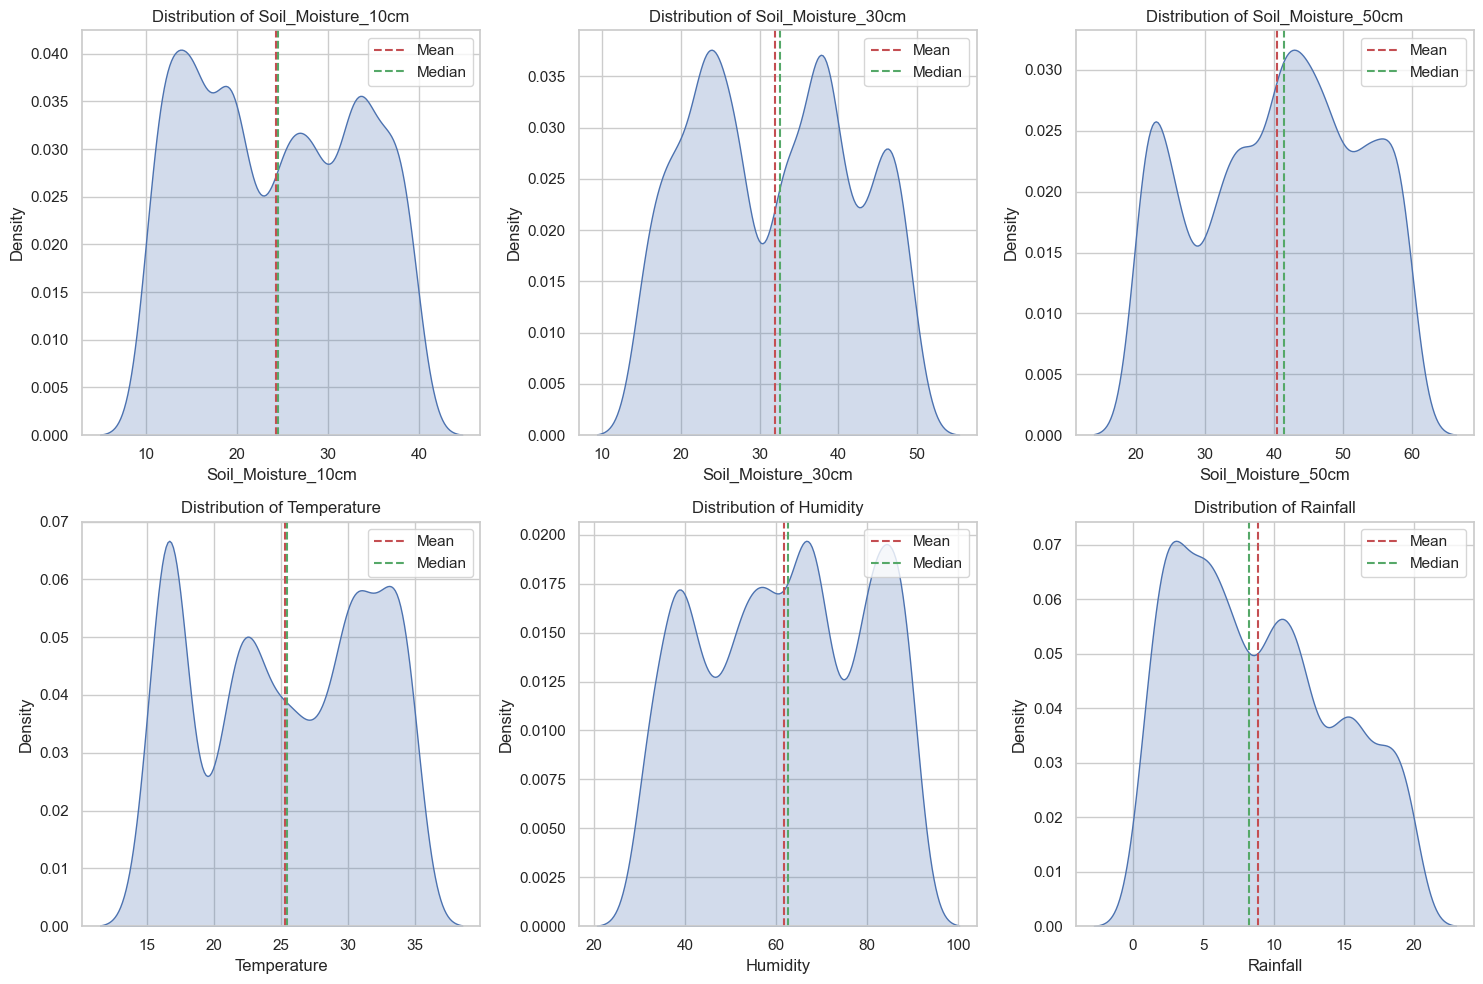

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('D:\AG Assignment\Dummy_Irrigation_Dataset.csv')

# List of features to visualize
features = ['Soil_Moisture_10cm', 'Soil_Moisture_30cm', 'Soil_Moisture_50cm', 
            'Temperature', 'Humidity', 'Rainfall']

# Set the style of the visualizations
sns.set(style="whitegrid")

# Create subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data[feature], bw_adjust=0.5, fill=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.axvline(data[feature].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(data[feature].median(), color='g', linestyle='--', label='Median')
    plt.legend()

plt.tight_layout()
plt.show()


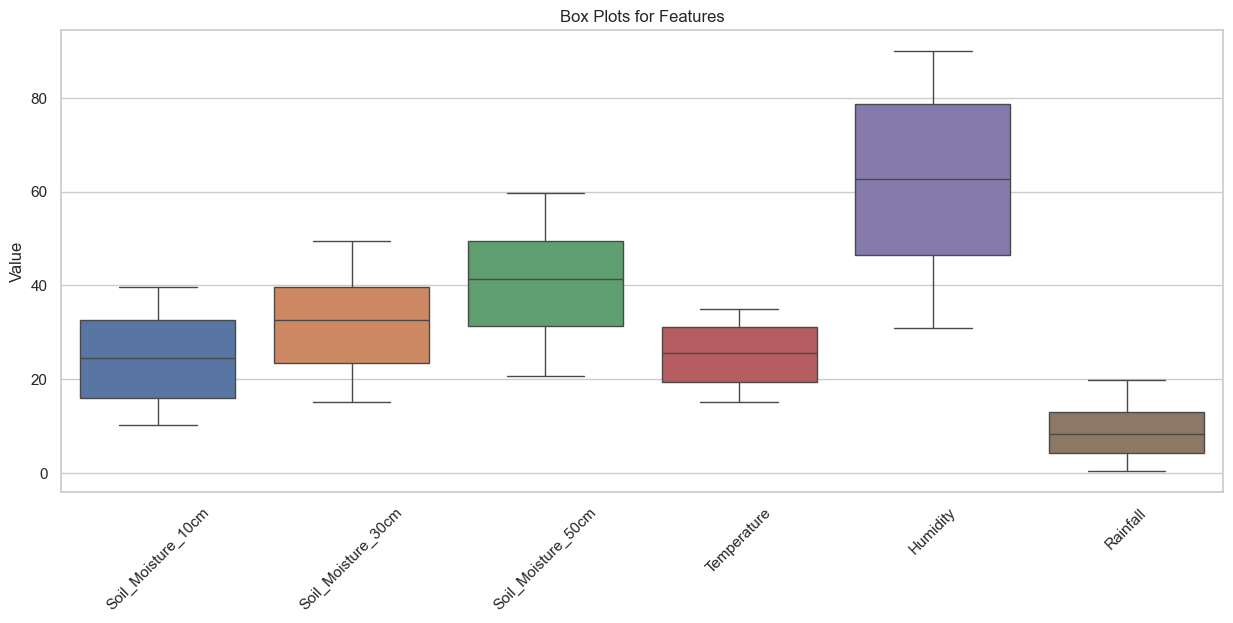

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[features])
plt.title('Box Plots for Features')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()


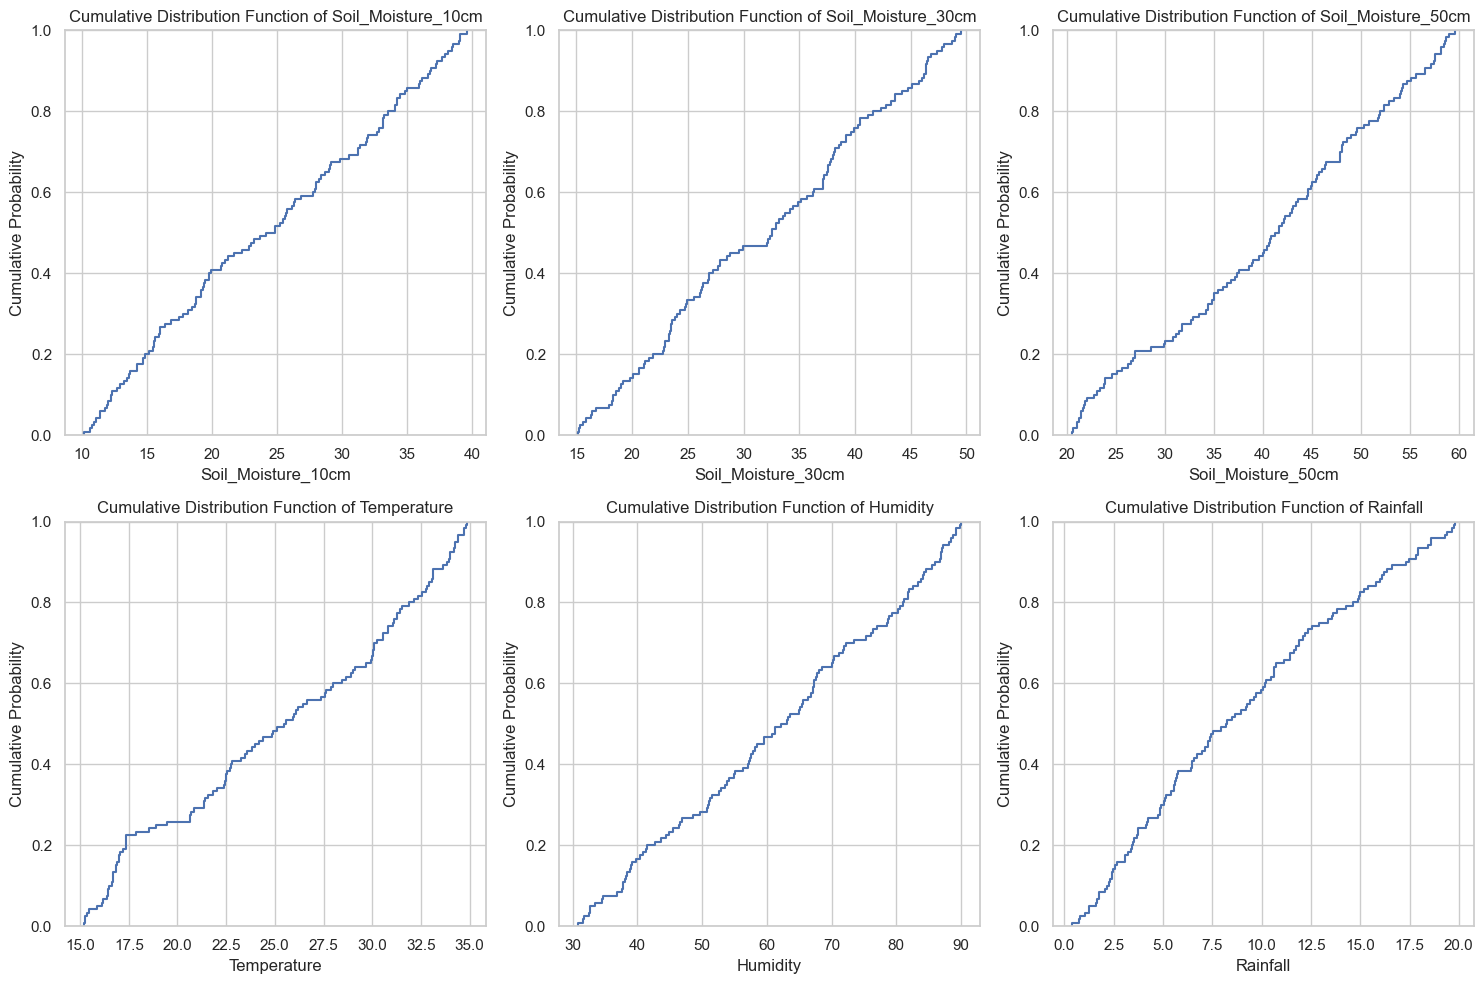

In [30]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.ecdfplot(data[feature])
    plt.title(f'Cumulative Distribution Function of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()


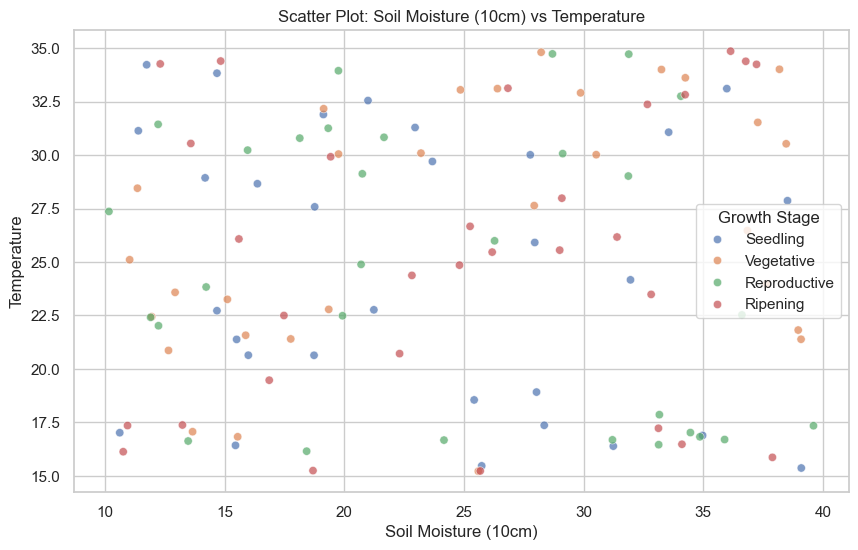

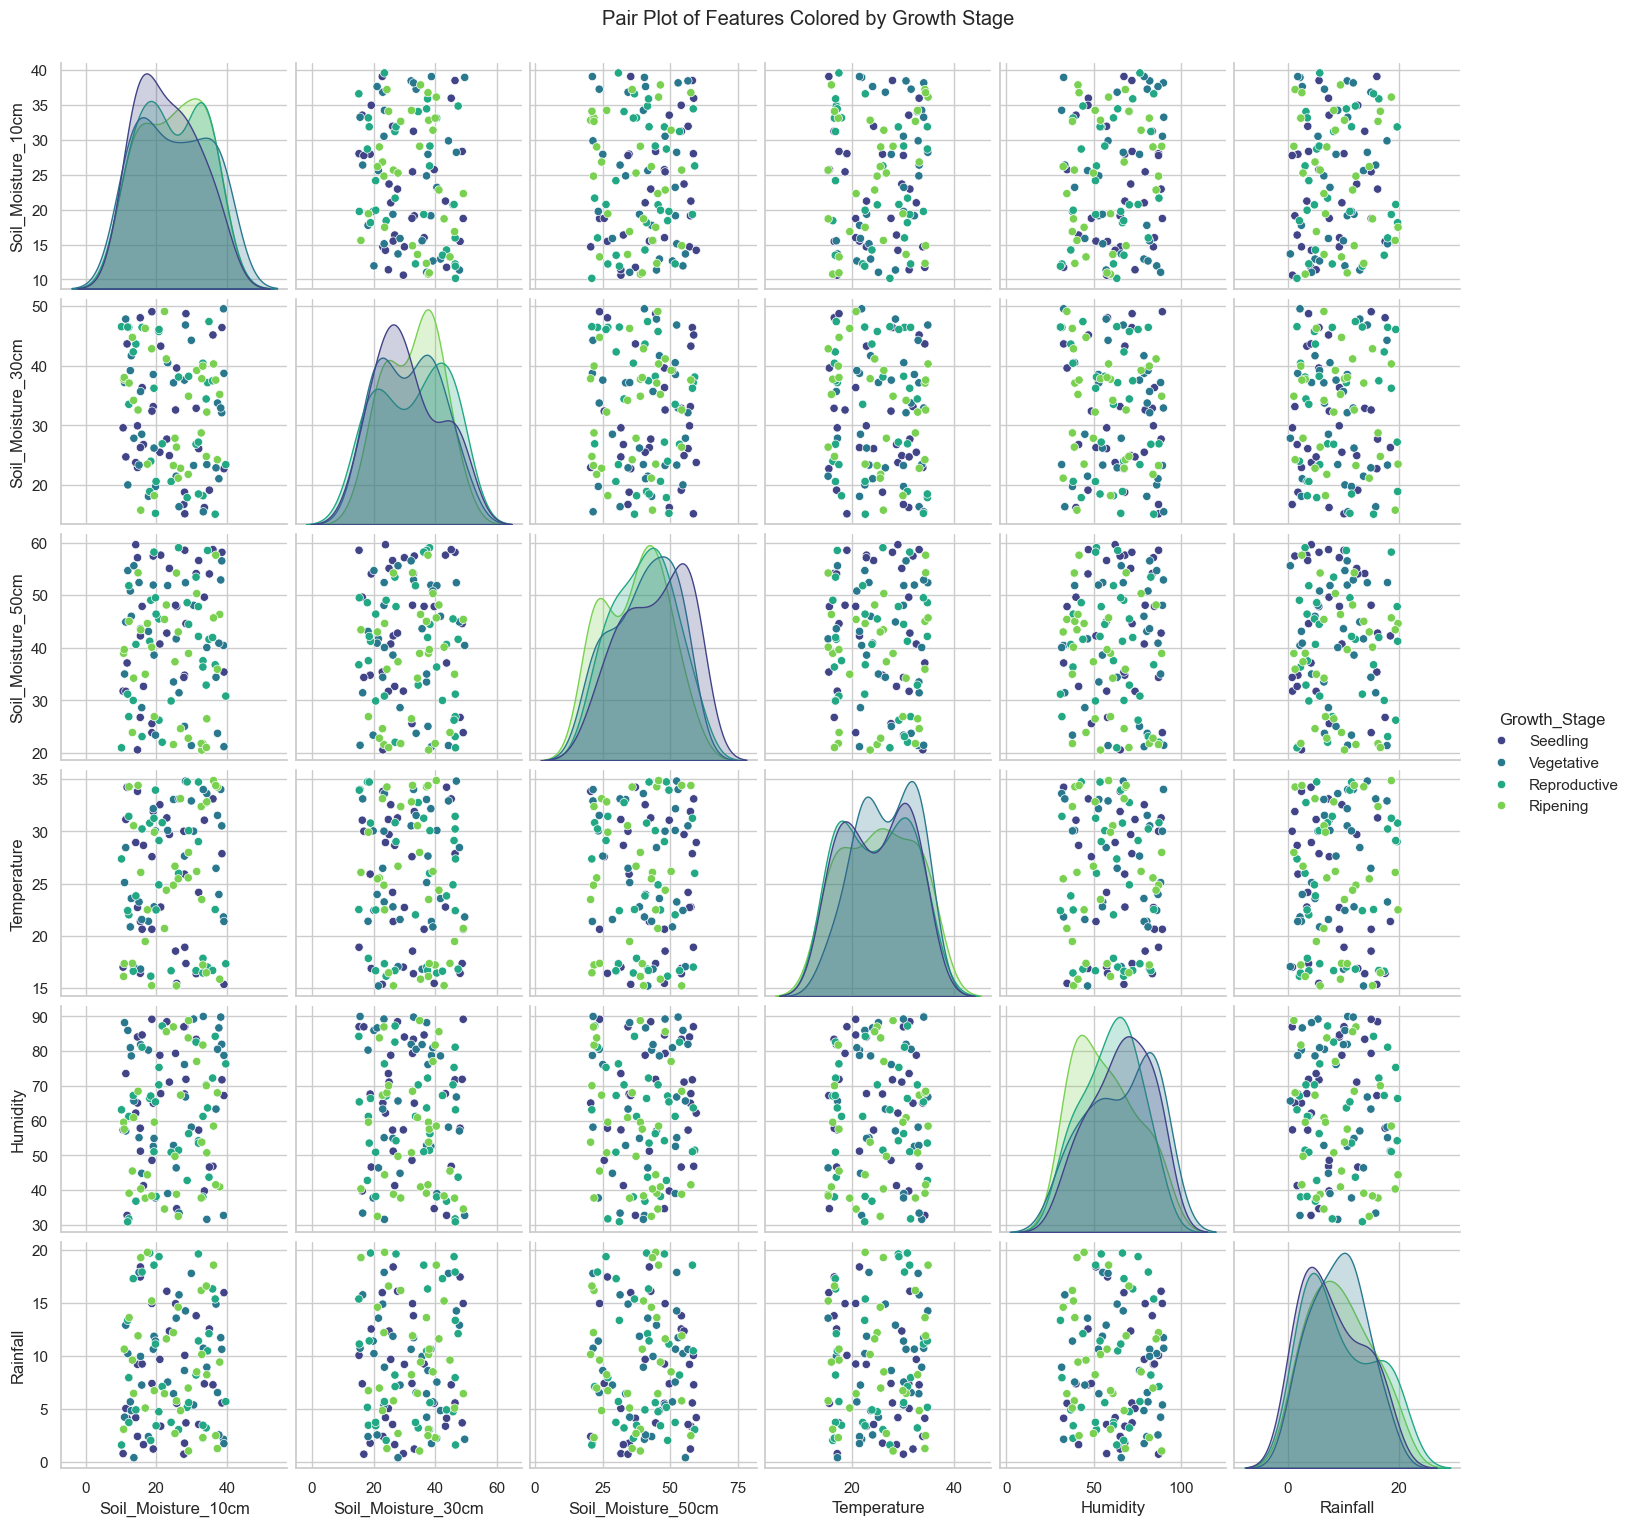

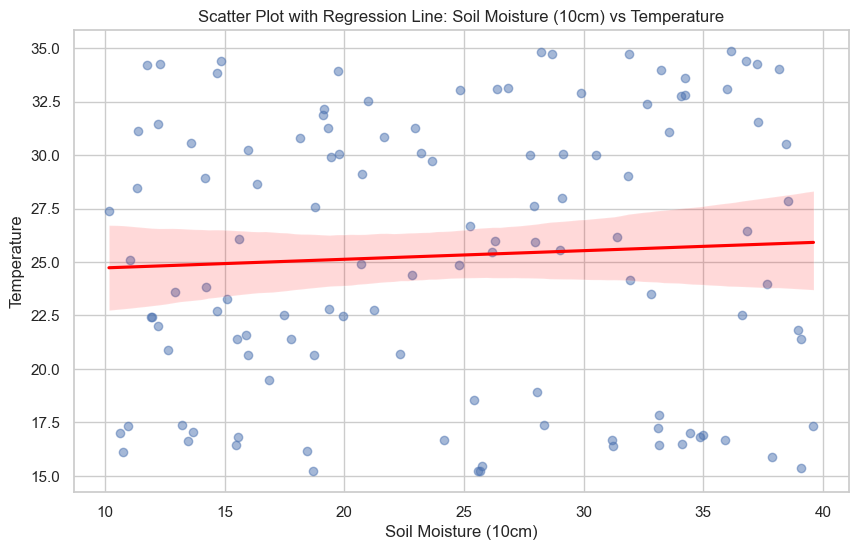

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Scatter plot for Soil Moisture (10cm) vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Soil_Moisture_10cm', y='Temperature', hue='Growth_Stage', alpha=0.7)
plt.title('Scatter Plot: Soil Moisture (10cm) vs Temperature')
plt.xlabel('Soil Moisture (10cm)')
plt.ylabel('Temperature')
plt.legend(title='Growth Stage')
plt.show()

# Pair plot for all features colored by Growth Stage
sns.pairplot(data, hue='Growth_Stage', vars=features, palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Features Colored by Growth Stage', y=1.02)
plt.show()

# Scatter plot with a regression line for Soil Moisture (10cm) vs Temperature
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Soil_Moisture_10cm', y='Temperature', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line: Soil Moisture (10cm) vs Temperature')
plt.xlabel('Soil Moisture (10cm)')
plt.ylabel('Temperature')
plt.show()


In [32]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate Q1 and Q3
Q1 = data['Soil_Moisture_10cm'].quantile(0.25)
Q3 = data['Soil_Moisture_10cm'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound_10cm = Q1 - 1.5 * IQR
upper_bound_10cm = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound_10cm}')
print(f'Upper Bound: {upper_bound_10cm}')


Lower Bound: -9.206246966111827
Upper Bound: 57.85300975061963


2. Z-Score Visualization
Calculate the Z-scores for your features and plot them. Points with a Z-score greater than a threshold (commonly 3 or -3) can be considered outliers.

python

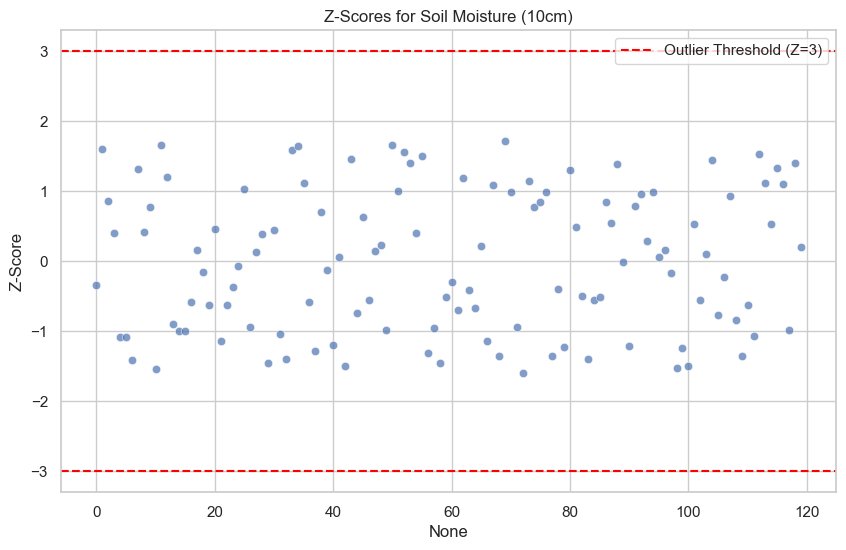

In [34]:
from scipy import stats

# Calculate Z-scores
data['Z_score'] = stats.zscore(data['Soil_Moisture_10cm'])

# Plot Z-scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['Z_score'], alpha=0.7)
plt.axhline(y=3, color='red', linestyle='--', label='Outlier Threshold (Z=3)')
plt.axhline(y=-3, color='red', linestyle='--')
plt.title('Z-Scores for Soil Moisture (10cm)')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


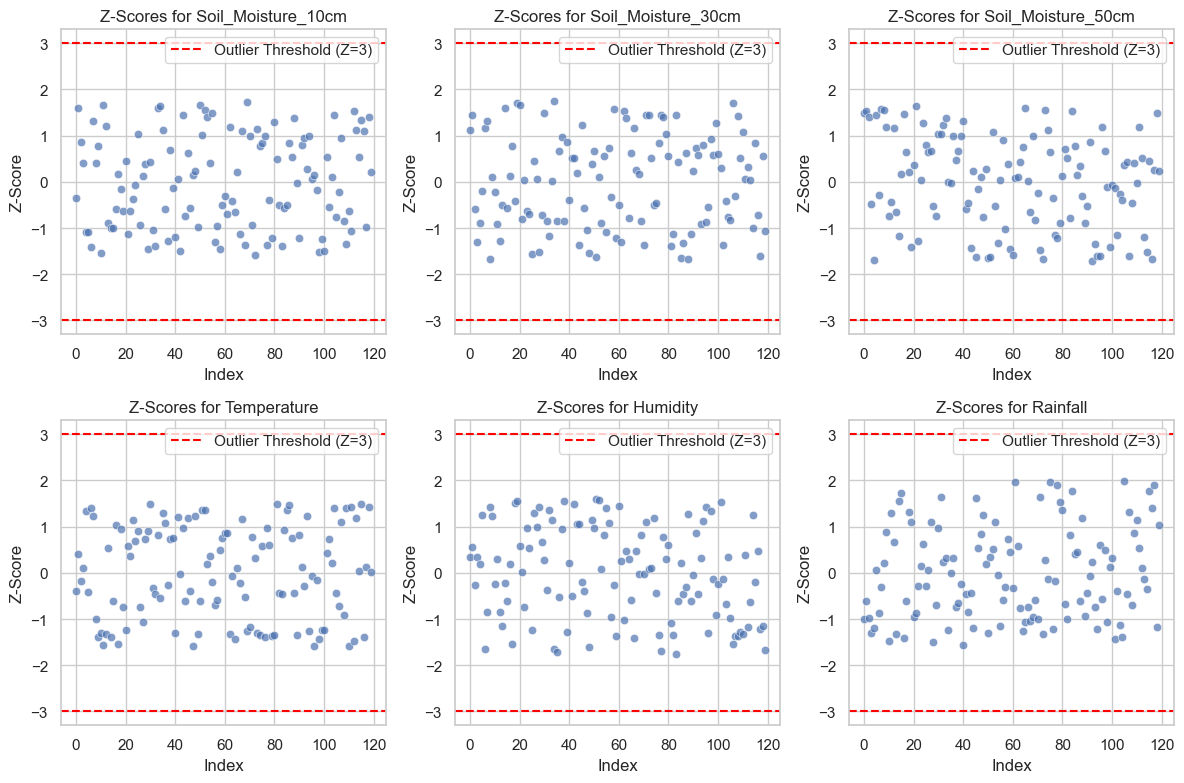

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming `data` is your DataFrame containing all the features
features = ['Soil_Moisture_10cm', 'Soil_Moisture_30cm', 'Soil_Moisture_50cm', 'Temperature', 'Humidity', 'Rainfall']

# Calculate Z-scores for each feature and create plots
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    # Calculate Z-scores
    data[f'{feature}_Z_score'] = stats.zscore(data[feature])
    
    # Create a subplot for each feature
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=data.index, y=data[f'{feature}_Z_score'], alpha=0.7)
    plt.axhline(y=3, color='red', linestyle='--', label='Outlier Threshold (Z=3)')
    plt.axhline(y=-3, color='red', linestyle='--')
    plt.title(f'Z-Scores for {feature}')
    plt.ylabel('Z-Score')
    plt.xlabel('Index')
    plt.legend()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [40]:
import pandas as pd

# Define the Q1 thresholds for each growth stage
data = {
    'Growth Stage': ['Seedling', 'Vegetative', 'Reproductive', 'Ripening'],
    'Soil Moisture 10cm (Q1)': [15.62415483788996, 15.629096717467949, 18.212362037568017, 25.469552808200454],
    'Soil Moisture 30cm (Q1)': [24.04744182748616, 23.024842608879368, 21.358961290362565, 34.54824187228601],
    'Soil Moisture 50cm (Q1)': [34.4863215391471, 31.976189132363885, 30.924306507321656, 38.952911997357816],
    'Temperature (Q1)': [18.640548830642324, 21.972143532759187, 17.102175223979884, 25.507989532564487],
    'Humidity (Q1)': [52.71896623268898, 52.654214358977555, 50.93030939814747, 55.67035615678594],
    'Rainfall (Q1)': [3.5777623609330886, 5.457527993234336, 3.7337241035572033, 8.970126271665752]
}

# Create a DataFrame
thresholds_df = pd.DataFrame(data)

# Display the DataFrame
print("Q1 Thresholds for Each Growth Stage:")
print(thresholds_df)

# Example function to check if conditions need irrigation
def check_irrigation(soil_moisture_10cm, soil_moisture_30cm, soil_moisture_50cm, temperature, humidity, rainfall):
    for index, row in thresholds_df.iterrows():
        stage = row['Growth Stage']
        if (soil_moisture_10cm < row['Soil Moisture 10cm (Q1)'] or 
            soil_moisture_30cm < row['Soil Moisture 30cm (Q1)'] or 
            soil_moisture_50cm < row['Soil Moisture 50cm (Q1)'] or 
            temperature < row['Temperature (Q1)'] or 
            humidity < row['Humidity (Q1)'] or 
            rainfall < row['Rainfall (Q1)']):
            print(f"Action Required: Conditions for {stage} stage are not optimal!")
            print(f"Current Conditions - Soil Moisture 10cm: {soil_moisture_10cm}, Soil Moisture 30cm: {soil_moisture_30cm}, Soil Moisture 50cm: {soil_moisture_50cm}, Temperature: {temperature}, Humidity: {humidity}, Rainfall: {rainfall}")
            print(f"Consider irrigation or adjustment for {stage} stage.\n")
            break
    else:
        print("Conditions are optimal for all growth stages.")

# Example current conditions (you can replace these values with actual measurements)
current_conditions = {
    'soil_moisture_10cm': 20,  # example value
    'soil_moisture_30cm': 25,  # example value
    'soil_moisture_50cm': 35,  # example value
    'temperature': 24,          # example value
    'humidity': 50,             # example value
    'rainfall': 4               # example value
}

# Check if irrigation is needed
check_irrigation(
    current_conditions['soil_moisture_10cm'],
    current_conditions['soil_moisture_30cm'],
    current_conditions['soil_moisture_50cm'],
    current_conditions['temperature'],
    current_conditions['humidity'],
    current_conditions['rainfall']
)


Q1 Thresholds for Each Growth Stage:
   Growth Stage  Soil Moisture 10cm (Q1)  Soil Moisture 30cm (Q1)  \
0      Seedling                15.624155                24.047442   
1    Vegetative                15.629097                23.024843   
2  Reproductive                18.212362                21.358961   
3      Ripening                25.469553                34.548242   

   Soil Moisture 50cm (Q1)  Temperature (Q1)  Humidity (Q1)  Rainfall (Q1)  
0                34.486322         18.640549      52.718966       3.577762  
1                31.976189         21.972144      52.654214       5.457528  
2                30.924307         17.102175      50.930309       3.733724  
3                38.952912         25.507990      55.670356       8.970126  
Action Required: Conditions for Seedling stage are not optimal!
Current Conditions - Soil Moisture 10cm: 20, Soil Moisture 30cm: 25, Soil Moisture 50cm: 35, Temperature: 24, Humidity: 50, Rainfall: 4
Consider irrigation or adjustmen

In [43]:
import pandas as pd

# Data for the DataFrame
data = {
    'Growth Stage': ['Seedling', 'Vegetative', 'Reproductive', 'Ripening'],
    'Soil Moisture (10cm) - Q1': [15.62415483788996, 15.629096717467949, 18.212362037568017, 17.01765044217807],
    'Soil Moisture (30cm) - Q1': [24.04744182748616, 23.024842608879368, 21.358961290362565, 24.41832032300278],
    'Soil Moisture (50cm) - Q1': [34.4863215391471, 31.976189132363885, 30.924306507321656, 25.111523486021785],
    'Temperature - Q1': [18.640548830642324, 21.972143532759187, 17.102175223979884, 17.900247936618342],
    'Humidity - Q1': [52.71896623268898, 52.654214358977555, 50.93030939814747, 40.48259547006052],
    'Rainfall - Q1': [3.5777623609330886, 5.457527993234336, 3.7337241035572033, 5.262762587657736]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Growth Stage  Soil Moisture (10cm) - Q1  Soil Moisture (30cm) - Q1  \
0      Seedling                  15.624155                  24.047442   
1    Vegetative                  15.629097                  23.024843   
2  Reproductive                  18.212362                  21.358961   
3      Ripening                  17.017650                  24.418320   

   Soil Moisture (50cm) - Q1  Temperature - Q1  Humidity - Q1  Rainfall - Q1  
0                  34.486322         18.640549      52.718966       3.577762  
1                  31.976189         21.972144      52.654214       5.457528  
2                  30.924307         17.102175      50.930309       3.733724  
3                  25.111523         17.900248      40.482595       5.262763  


In [47]:
X

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall
0,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701
1,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807
2,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210
3,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051
4,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717
...,...,...,...,...,...,...
115,36.143818,40.285824,45.696771,34.859296,58.437698,18.590583
116,34.110162,24.827033,21.060452,16.475931,70.053464,16.612388
117,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538
118,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944
